In [1]:
from rubin_scheduler.scheduler.example import example_scheduler
import numpy as np
import healpy as hp

from rubin_scheduler.scheduler.utils import SimTargetooServer, TargetoO
from rubin_scheduler.scheduler.model_observatory import ModelObservatory
from rubin_scheduler.scheduler.surveys import ToOScriptedSurvey

from rubin_scheduler.scheduler import sim_runner

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
nside = 32
observatory = ModelObservatory(nside=nside,)# sim_to_o=sim_to_o)

In [3]:
# Make a ToO event

# Make a healpix map, can be any nside
footprint = np.zeros(hp.nside2npix(nside))
# Set some healpix near the pole to be where to observe
footprint[-2:] = 1

# Set the event to go off at the start of the survey
event_start = observatory.mjd
duration = 20 # Days

# Need to set a nominal center for the event
# could just take mean of RA,dec HEALpix map I suppose
ra_deg = 0.
dec_deg = -90.

# ToO type. Should probabably document the 
# options for this somewhere.
too_type = "" 

# Unique int ID for each event
target_id = 100

event = TargetoO(
                target_id,
                footprint,
                event_start,
                duration,
                ra_rad_center=np.radians(ra_deg),
                dec_rad_center=np.radians(dec_deg),
                too_type=too_type)
# Thing to pass to the ModelObservatory so it will send out
# the ToO alert in the Conditions object
sim_to_o = SimTargetooServer([event])

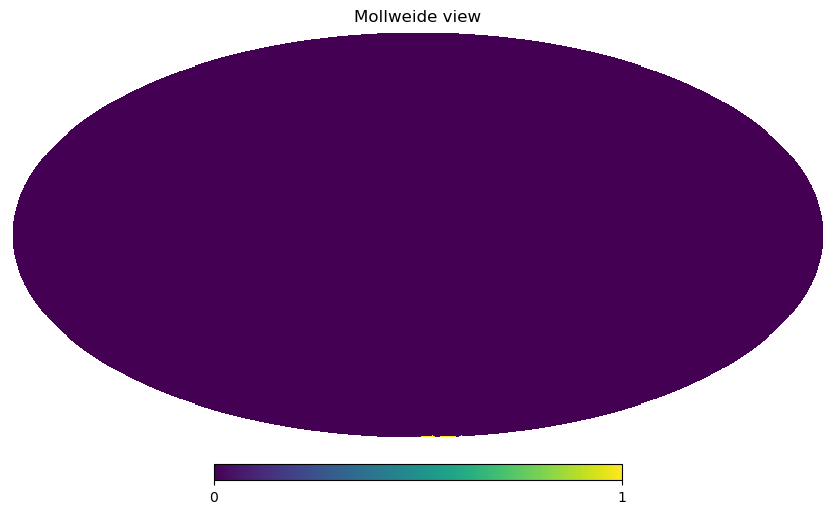

In [4]:
hp.mollview(footprint)

In [5]:
# make a ToO survey object
survey = ToOScriptedSurvey([], times=[1], bands_at_times=["g"], nvis=[1], exptimes=[30.],
                          followup_footprint=np.ones(hp.nside2npix(nside)),
                          HA_min=0, HA_max=24)

In [6]:
conditions = observatory.return_conditions()
conditions.targets_of_opportunity = [event]

In [7]:
survey.calc_reward_function(conditions)

-inf

In [8]:
survey.obs_wanted

ScheduledObservationArray([(0, 4.27017118, -1.51873024, 60980.12559078, 60980.20892411, 30., 'g', '', 0., 0., 0., 0., 2, 'ToO, 100_t1_i0, 1', 'ToO_i0', '', '', 0.04166667, 0.00872665, 0.43633231, 1.48352986, 24., 0., 0., 0., False),
                           (0, 5.42705026, -1.52295334, 60980.12559078, 60980.20892411, 30., 'g', '', 0., 0., 0., 0., 2, 'ToO, 100_t1_i0, 2', 'ToO_i0', '', '', 0.04166667, 0.00872665, 0.43633231, 1.48352986, 24., 0., 0., 0., False)],
                          dtype=[('ID', '<i8'), ('RA', '<f8'), ('dec', '<f8'), ('mjd', '<f8'), ('flush_by_mjd', '<f8'), ('exptime', '<f8'), ('band', '<U1'), ('filter', '<U40'), ('rotSkyPos', '<f8'), ('rotTelPos', '<f8'), ('rotTelPos_backup', '<f8'), ('rotSkyPos_desired', '<f8'), ('nexp', '<i8'), ('scheduler_note', '<U40'), ('target_name', '<U40'), ('science_program', '<U40'), ('observation_reason', '<U40'), ('mjd_tol', '<f8'), ('dist_tol', '<f8'), ('alt_min', '<f8'), ('alt_max', '<f8'), ('HA_max', '<f8'), ('HA_min', '<f8'), ('s